In [1]:
spark = SparkSession.builder \
   .master("local") \
   .appName("StockMarket") \
   .config("spark.executor.memory", "6gb") \
   .getOrCreate()

In [2]:
df =spark.read.format('com.databricks.spark.csv')\
                    .options(header='true', inferschema='true')\
                    .load('AAPL.csv')

In [3]:
df.show()

+-------------------+--------+--------+--------+--------+---------+---------+
|               Date|    Open|    High|     Low|   Close|Adj Close|   Volume|
+-------------------+--------+--------+--------+--------+---------+---------+
|2000-01-03 00:00:00|3.745536|4.017857|3.631696|3.997768|  2.69592|133949200|
|2000-01-04 00:00:00|3.866071|3.950893|3.613839|3.660714| 2.468626|128094400|
|2000-01-05 00:00:00|3.705357|3.948661|3.678571|3.714286| 2.504751|194580400|
|2000-01-06 00:00:00|3.790179|3.821429|3.392857|3.392857| 2.287994|191993200|
|2000-01-07 00:00:00|3.446429|3.607143|3.410714|3.553571| 2.396373|115183600|
|2000-01-10 00:00:00|3.642857|3.651786|3.383929|3.491071| 2.354226|126266000|
|2000-01-11 00:00:00|3.426339|3.549107|3.232143|  3.3125| 2.233805|110387200|
|2000-01-12 00:00:00|3.392857|3.410714|3.089286|3.113839| 2.099837|244017200|
|2000-01-13 00:00:00|3.374439|3.526786|3.303571|3.455357| 2.330141|258171200|
|2000-01-14 00:00:00|3.571429|3.651786|3.549107|3.587054| 2.4189

In [4]:
import pyspark.sql.functions as f
df = df.withColumn('date', f.to_date('Date'))

In [5]:
df.show(n=5)

+----------+--------+--------+--------+--------+---------+---------+
|      date|    Open|    High|     Low|   Close|Adj Close|   Volume|
+----------+--------+--------+--------+--------+---------+---------+
|2000-01-03|3.745536|4.017857|3.631696|3.997768|  2.69592|133949200|
|2000-01-04|3.866071|3.950893|3.613839|3.660714| 2.468626|128094400|
|2000-01-05|3.705357|3.948661|3.678571|3.714286| 2.504751|194580400|
|2000-01-06|3.790179|3.821429|3.392857|3.392857| 2.287994|191993200|
|2000-01-07|3.446429|3.607143|3.410714|3.553571| 2.396373|115183600|
+----------+--------+--------+--------+--------+---------+---------+
only showing top 5 rows



In [6]:
date_breakdown = ['year', 'month', 'day']
for i in enumerate(date_breakdown):
    index = i[0]
    name = i[1]
    df = df.withColumn(name, f.split('date', '-')[index])

In [7]:
df.show(n=10)

+----------+--------+--------+--------+--------+---------+---------+----+-----+---+
|      date|    Open|    High|     Low|   Close|Adj Close|   Volume|year|month|day|
+----------+--------+--------+--------+--------+---------+---------+----+-----+---+
|2000-01-03|3.745536|4.017857|3.631696|3.997768|  2.69592|133949200|2000|   01| 03|
|2000-01-04|3.866071|3.950893|3.613839|3.660714| 2.468626|128094400|2000|   01| 04|
|2000-01-05|3.705357|3.948661|3.678571|3.714286| 2.504751|194580400|2000|   01| 05|
|2000-01-06|3.790179|3.821429|3.392857|3.392857| 2.287994|191993200|2000|   01| 06|
|2000-01-07|3.446429|3.607143|3.410714|3.553571| 2.396373|115183600|2000|   01| 07|
|2000-01-10|3.642857|3.651786|3.383929|3.491071| 2.354226|126266000|2000|   01| 10|
|2000-01-11|3.426339|3.549107|3.232143|  3.3125| 2.233805|110387200|2000|   01| 11|
|2000-01-12|3.392857|3.410714|3.089286|3.113839| 2.099837|244017200|2000|   01| 12|
|2000-01-13|3.374439|3.526786|3.303571|3.455357| 2.330141|258171200|2000|   

In [8]:
df_plot = df.select('year', 'Adj Close').toPandas()

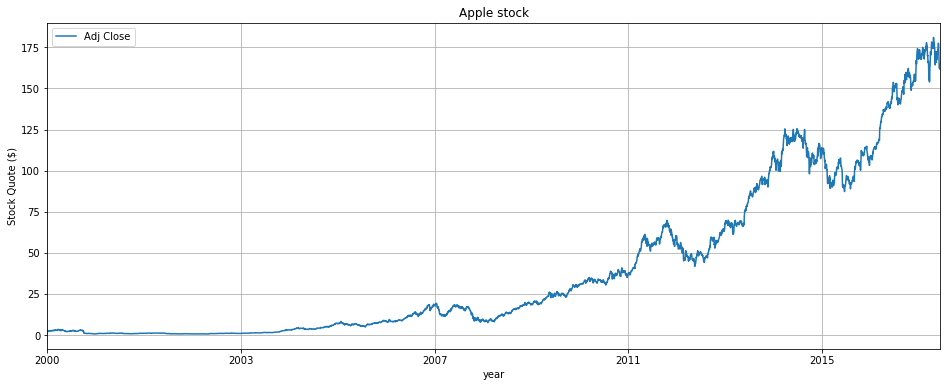

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

df_plot.set_index('year', inplace=True)
df_plot.plot(figsize=(16, 6), grid=True)
plt.title('Apple stock')
plt.ylabel('Stock Quote ($)')
plt.show()

In [10]:
df.toPandas().shape

(4610, 10)

In [11]:
df.dropna().count()

4610

In [12]:
df.select('Open', 'High', 'Low', 'Close', 'Adj Close').describe().show()

+-------+------------------+-----------------+-----------------+------------------+-----------------+
|summary|              Open|             High|              Low|             Close|        Adj Close|
+-------+------------------+-----------------+-----------------+------------------+-----------------+
|  count|              4610|             4610|             4610|              4610|             4610|
|   mean|46.319638522993586|46.75264737505422|  45.853888678091| 46.31249455574832|39.94770416811271|
| stddev| 49.20256362250941| 49.5813980430415|48.81455218501357|49.203718795182205|47.79307553718152|
|    min|          0.927857|         0.942143|         0.908571|          0.937143|         0.631968|
|    max|        182.589996|            183.5|       180.210007|        181.720001|       181.021957|
+-------+------------------+-----------------+-----------------+------------------+-----------------+



In [13]:
df.groupBy(['year']).agg({'Adj Close':'count'})\
            .withColumnRenamed('count(Adj Close)', 'Row Count')\
            .orderBy(["year"],ascending=False)\
            .show()

+----+---------+
|year|Row Count|
+----+---------+
|2018|       82|
|2017|      251|
|2016|      252|
|2015|      252|
|2014|      252|
|2013|      252|
|2012|      250|
|2011|      252|
|2010|      252|
|2009|      252|
|2008|      253|
|2007|      251|
|2006|      251|
|2005|      252|
|2004|      252|
|2003|      252|
|2002|      252|
|2001|      248|
|2000|      252|
+----+---------+



In [14]:
trainDF = df[df.year < 2017] 
testDF = df[df.year > 2016]

In [15]:
trainDF.toPandas().shape

(4277, 10)

In [16]:
testDF.toPandas().shape

(333, 10)

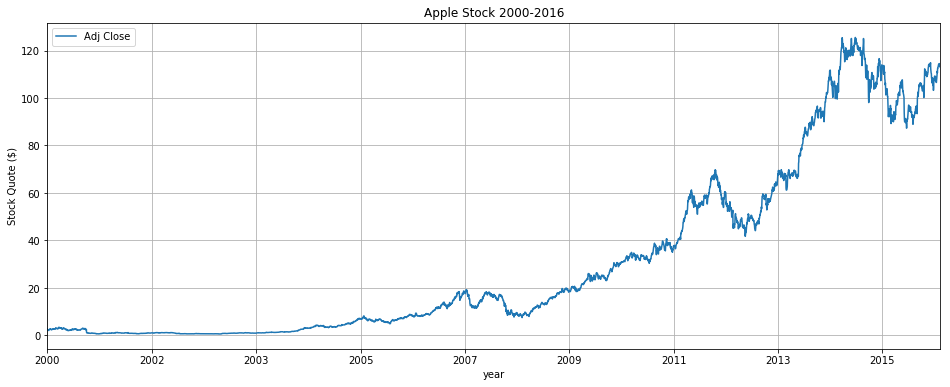

In [17]:
trainDF_plot = trainDF.select('year', 'Adj Close').toPandas()
trainDF_plot.set_index('year', inplace=True)
trainDF_plot.plot(figsize=(16, 6), grid=True)
plt.title('Apple Stock 2000-2016')
plt.ylabel('Stock Quote ($)')
plt.show()

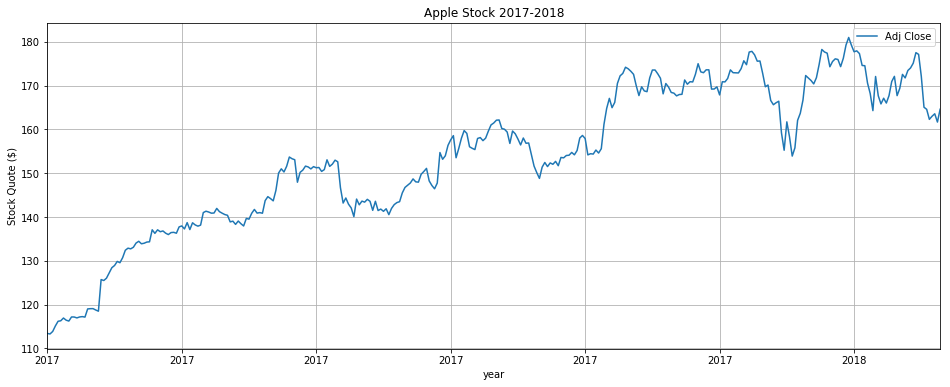

In [18]:
testDF_plot = testDF.select('year', 'Adj Close').toPandas()
testDF_plot.set_index('year', inplace=True)
testDF_plot.plot(figsize=(16, 6), grid=True)
plt.title('Apple Stock 2017-2018')
plt.ylabel('Stock Quote ($)')
plt.show()

In [19]:
import numpy as np
trainArray = np.array(trainDF.select('Open', 'High', 'Low', 'Close','Volume', 'Adj Close' ).collect())
testArray = np.array(testDF.select('Open', 'High', 'Low', 'Close','Volume', 'Adj Close' ).collect())

In [20]:
print(trainArray[0])
print('-------------')
print(testArray[0])

[3.745536e+00 4.017857e+00 3.631696e+00 3.997768e+00 1.339492e+08
 2.695920e+00]
-------------
[1.15800003e+02 1.16330002e+02 1.14760002e+02 1.16150002e+02
 2.87819000e+07 1.13410263e+02]


In [21]:
from sklearn.preprocessing import MinMaxScaler
minMaxScale = MinMaxScaler()

In [22]:
minMaxScale.fit(trainArray)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
testingArray = minMaxScale.transform(testArray)
trainingArray = minMaxScale.transform(trainArray)

In [24]:
print(testingArray[0])
print('--------------')
print(trainingArray[0])

[0.86025834 0.86369548 0.8724821  0.87240926 0.01026612 0.90325687]
--------------
[0.02110113 0.02302218 0.02086823 0.02317552 0.0672496  0.01653048]


In [25]:
xtrain = trainingArray[:, 0:-1]
xtest = testingArray[:, 0:-1]
# ytrain = trainingArray[:, 5]
# ytest = testingArray[:, 5]
ytrain = trainingArray[:, -1:]
ytest = testingArray[:, -1:]

In [26]:
trainingArray[0]

array([0.02110113, 0.02302218, 0.02086823, 0.02317552, 0.0672496 ,
       0.01653048])

In [27]:
xtrain[0]

array([0.02110113, 0.02302218, 0.02086823, 0.02317552, 0.0672496 ])

In [28]:
ytrain[0]

array([0.01653048])

In [29]:
print('xtrain shape = {}'.format(xtrain.shape))
print('xtest shape = {}'.format(xtest.shape))
print('ytrain shape = {}'.format(ytrain.shape))
print('ytest shape = {}'.format(ytest.shape))

xtrain shape = (4277, 5)
xtest shape = (333, 5)
ytrain shape = (4277, 1)
ytest shape = (333, 1)


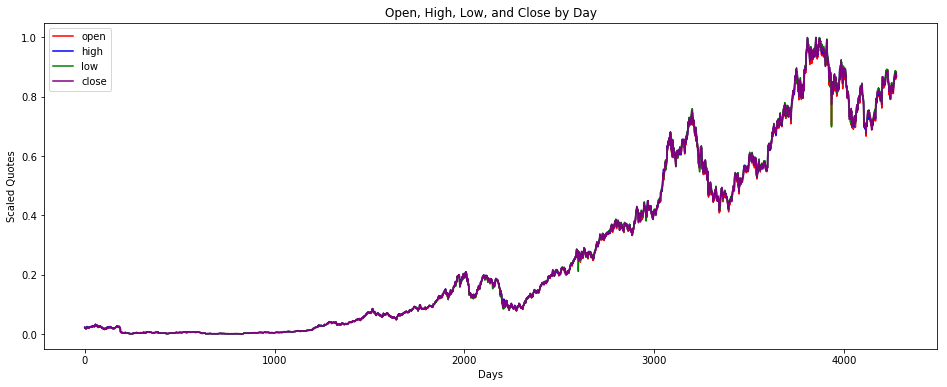

In [30]:
plt.figure(figsize=(16,6))
plt.plot(xtrain[:,0],color='red', label='open')
plt.plot(xtrain[:,1],color='blue', label='high')
plt.plot(xtrain[:,2],color='green', label='low')
plt.plot(xtrain[:,3],color='purple', label='close')
plt.legend(loc = 'upper left')
plt.title('Open, High, Low, and Close by Day')
plt.xlabel('Days')
plt.ylabel('Scaled Quotes')
plt.show()

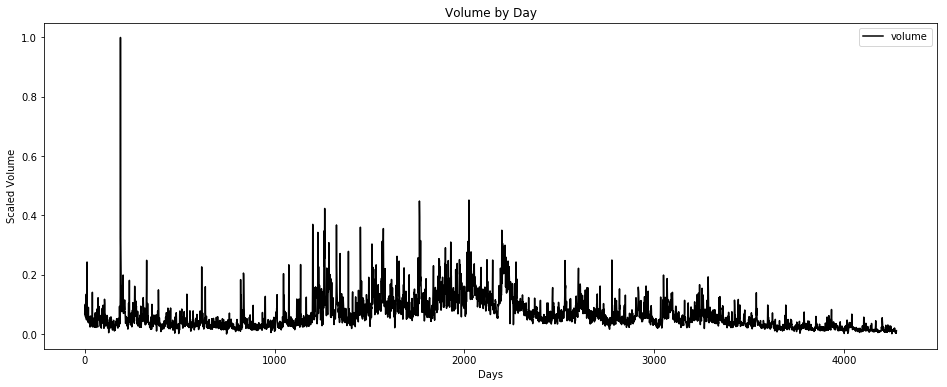

In [31]:
plt.figure(figsize=(16,6))
plt.plot(xtrain[:,4],color='black', label='volume')
plt.legend(loc = 'upper right')
plt.title('Volume by Day')
plt.xlabel('Days')
plt.ylabel('Scaled Volume')
plt.show()

In [32]:
from keras import models, layers

Using TensorFlow backend.


In [33]:
model = models.Sequential()
model.add(layers.LSTM(1, input_shape=(1,5)))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
xtrain = xtrain.reshape((xtrain.shape[0], 1, xtrain.shape[1]))
xtest  = xtest.reshape((xtest.shape[0], 1, xtest.shape[1]))

In [35]:
print('The shape of xtrain is {}: '.format(xtrain.shape))
print('The shape of xtest is {}: '.format(xtest.shape))

The shape of xtrain is (4277, 1, 5): 
The shape of xtest is (333, 1, 5): 


In [36]:
loss = model.fit(xtrain, ytrain, batch_size=10, epochs=100)

Epoch 1/100
4277/4277 [==============================] - 1s 349us/step - loss: 0.0681
Epoch 2/100
4277/4277 [==============================] - 1s 249us/step - loss: 0.0105
Epoch 3/100
4277/4277 [==============================] - 1s 225us/step - loss: 0.0028
Epoch 4/100
4277/4277 [==============================] - 1s 234us/step - loss: 0.0019
Epoch 5/100
4277/4277 [==============================] - 1s 214us/step - loss: 0.0017
Epoch 6/100
4277/4277 [==============================] - 1s 217us/step - loss: 0.0015
Epoch 7/100
4277/4277 [==============================] - 1s 239us/step - loss: 0.0014
Epoch 8/100
4277/4277 [==============================] - 1s 218us/step - loss: 0.0013
Epoch 9/100
4277/4277 [==============================] - 1s 215us/step - loss: 0.0012
Epoch 10/100
4277/4277 [==============================] - 1s 210us/step - loss: 0.0012
Epoch 11/100
4277/4277 [==============================] - 1s 251us/step - loss: 0.0012
Epoch 12/100
4277/4277 [============================

4277/4277 [==============================] - 1s 233us/step - loss: 6.8037e-04
Epoch 92/100
4277/4277 [==============================] - 1s 303us/step - loss: 6.8333e-04
Epoch 93/100
4277/4277 [==============================] - 1s 294us/step - loss: 6.7891e-04
Epoch 94/100
4277/4277 [==============================] - 1s 285us/step - loss: 6.7643e-04
Epoch 95/100
4277/4277 [==============================] - 1s 249us/step - loss: 6.8788e-04
Epoch 96/100
4277/4277 [==============================] - 1s 309us/step - loss: 6.8759e-04
Epoch 97/100
4277/4277 [==============================] - 1s 301us/step - loss: 6.7556e-04
Epoch 98/100
4277/4277 [==============================] - 1s 298us/step - loss: 6.7970e-04
Epoch 99/100
4277/4277 [==============================] - 1s 259us/step - loss: 6.7016e-04
Epoch 100/100
4277/4277 [==============================] - 1s 213us/step - loss: 6.8047e-04


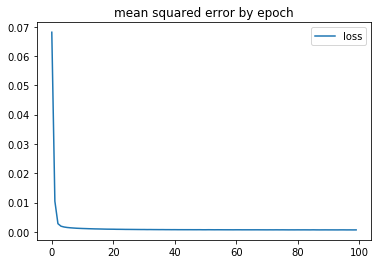

In [37]:
plt.plot(loss.history['loss'], label = 'loss')
plt.title('mean squared error by epoch')
plt.legend()
plt.show()

In [38]:
predicted = model.predict(xtest)

In [39]:
combined_array = np.concatenate((ytest, predicted), axis = 1)

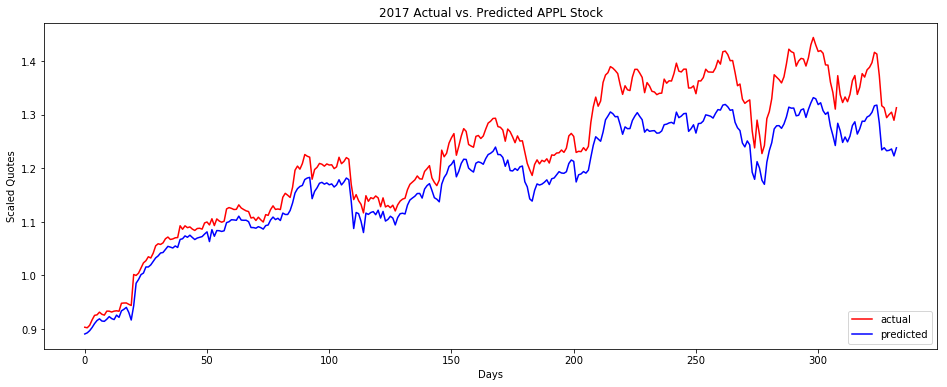

In [40]:
plt.figure(figsize=(16,6))
plt.plot(combined_array[:,0],color='red', label='actual')
plt.plot(combined_array[:,1],color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('2017 Actual vs. Predicted APPL Stock')
plt.xlabel('Days')
plt.ylabel('Scaled Quotes')
plt.show()

In [41]:
import sklearn.metrics as metrics
np.sqrt(metrics.mean_squared_error(ytest,predicted))

0.05841243272182954